# WeatherPy Data Analysis
_____

### Trend Analysis
________

* Based on the temperature dataset where the data collection occurred on April 1st of 2019, the max temperature tends to be warmer as it gets closer to the equatorial line (0 degrees), and it tends to be colder as it gets far away from the equatorial line. An important fact that needs to be taken into consideration is the weather seasons around the world. On April, the weather tends to be warmer on the South Pole region (ends of the summer season) and colder on the North Pole region (ends of the winter season). By doing a mean estimate based on the dataset provided, we can conclude the warmer areas and in the interval -20 and 20 degrees of latitude.

* The correlation between latitude and the relative humidity with R-squared coefficient equals to 0.011 seem to be not accurate. Be exposed to high humidity in winter isn't uncomfortable, but high summer humidity makes the air feel sticky. High and low rates of humidity of the people living near or away from the equatorial line can be found in this dataset. Additional data is necessary in order to predict accurate results.

* No significant correlation was found between latitude and cloud cloudiness (R-squared = 0.0062) or wind speed (R-squared = 0.005). However, wind speed seems to present a constant pattern (between 0 and 20 mph) across the dataset.

#### 1. Dependencies

In [117]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from config import api_key
from citipy import citipy

#### 2. Global variables

In [142]:
output_data_file = "output/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)
range_size = 1500

api_url = "http://api.openweathermap.org/data/2.5/weather?"
api_page_size = 50
api_sleep = 10

#### 3. Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=lat_range[0], high=lat_range[1], size=range_size)
lngs = np.random.uniform(low=lng_range[0], high=lng_range[1], size=range_size)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

#### 4. Perform API Calls

In [105]:
df_weather = pd.DataFrame(columns=['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed'])
chunk_cities = [cities[i: i + api_page_size] for i in range(0, len(cities), api_page_size)]

print ('Beginning Data Retrieval')
print ('-----------------------------')

for chunk in chunk_cities:
    for city in chunk:
        params = {
            "q" : city,
            "appid" : api_key,
            "units" : 'imperial'
        }

        response = requests.get(url = api_url, params = params)

        if response.status_code == 200:

            try:
                print (f'Processing Record {chunk.index(city) + 1} of Set {chunk_cities.index(chunk) + 1} | {params["q"]}')
                
                weather = response.json()

                df_weather = df_weather.append({
                    'City' : params['q'],
                    'Cloudiness' : weather['clouds']['all'],
                    'Country' : weather['sys']['country'],
                    'Date' : weather['dt'],
                    'Humidity' : weather['main']['humidity'],
                    'Lat' : weather['coord']['lat'],
                    'Lng' : weather['coord']['lon'],
                    'Max Temp' : weather['main']['temp_max'],
                    'Wind Speed' :  weather['wind']['speed']
                }, ignore_index = True)

            except:
                print (f'Error parsing JSON object - url : {response.url}')

        elif response.status_code == 404:
            print (f"City not found - {params['q']}. Skipping...")

        else:
            print (f'Error code : {response.status_code} - response {response.text}')
    
    time.sleep(api_sleep)
           
print ('-----------------------------')
print ('Data Retrieval Complete')
print ('-----------------------------')
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | carutapera
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | ler
Processing Record 4 of Set 1 | karratha
Processing Record 5 of Set 1 | hasaki
City not found - illoqqortoormiut. Skipping...
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | barabai
Processing Record 9 of Set 1 | miyako
Processing Record 10 of Set 1 | vila do maio
Processing Record 11 of Set 1 | zapolyarnyy
Processing Record 12 of Set 1 | airai
Processing Record 13 of Set 1 | byron bay
Processing Record 14 of Set 1 | esperance
Processing Record 15 of Set 1 | albany
City not found - tabiauea. Skipping...
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | boa vista
Processing Record 19 of Set 1 | cidreira
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | maniitsoq
Processing Record 23 of Set 1 | vestmannaey

#### 5. Convert Raw Data to DataFrame

In [107]:
df_weather.to_csv(output_data_file, header=True, index=False)
df_weather.head(5)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,carutapera,92,BR,1554165541,99,-1.20,-46.02,76.27,4.70
1,punta arenas,90,CL,1554165147,93,-53.16,-70.91,50.00,11.41
2,ler,0,NO,1554165544,80,63.20,10.30,35.60,11.41
3,karratha,0,AU,1554165486,74,-20.74,116.85,81.31,6.15
4,hasaki,20,JP,1554165450,48,35.73,140.83,48.00,12.75


#### 6. Plotting the Data

##### Latitude vs. Temperature Plot

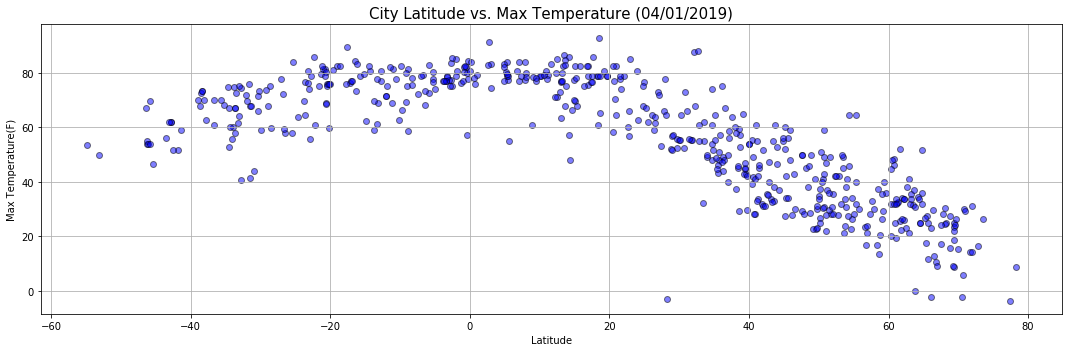

In [140]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(x=df_weather['Lat'], y=df_weather['Max Temp'], alpha=0.5, c='blue', linewidth=1, edgecolors='black')
ax.set_title(f'City Latitude vs. Max Temperature ({datetime.date.today().strftime("%m/%d/%Y")})',{'fontsize' : 15})
ax.set_xlabel('Latitude')
ax.set_ylabel('Max Temperature(F)')

ax.set_xlim(auto=True)
ax.set_ylim(auto=True)

ax.grid(True)

fig.tight_layout()
fig.savefig('output/latitude_temperature.png')

##### Latitude vs. Humidity Plot

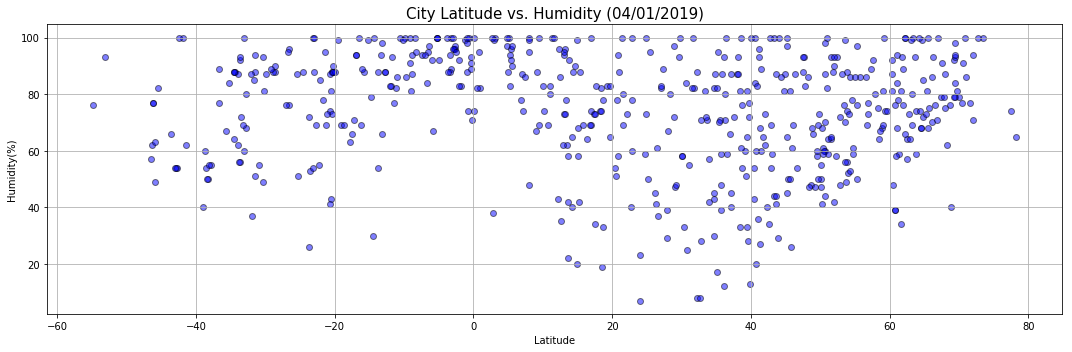

In [139]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(x=df_weather['Lat'], y=df_weather['Humidity'], alpha=0.5, c='blue', linewidth=1, edgecolors='black')
ax.set_title(f'City Latitude vs. Humidity ({datetime.date.today().strftime("%m/%d/%Y")})',{'fontsize' : 15})
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity(%)')

ax.set_xlim(auto=True)
ax.set_ylim(auto=True)

ax.grid(True)

fig.tight_layout()
fig.savefig('output/latitude_humidity.png')

##### Latitude vs. Cloudiness Plot

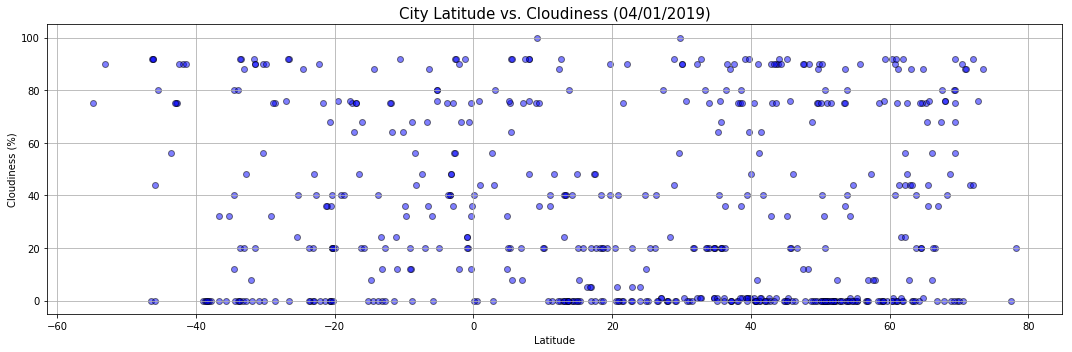

In [138]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(x=df_weather['Lat'], y=df_weather['Cloudiness'], alpha=0.5, c='blue', linewidth=1, edgecolors='black')
ax.set_title(f'City Latitude vs. Cloudiness ({datetime.date.today().strftime("%m/%d/%Y")})',{'fontsize' : 15})
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness (%)')

ax.set_xlim(auto=True)
ax.set_ylim(auto=True)

ax.grid(True)

fig.tight_layout()
fig.savefig('output/latitude_cloudiness.png')

##### Latitude vs. Wind Speed Plot

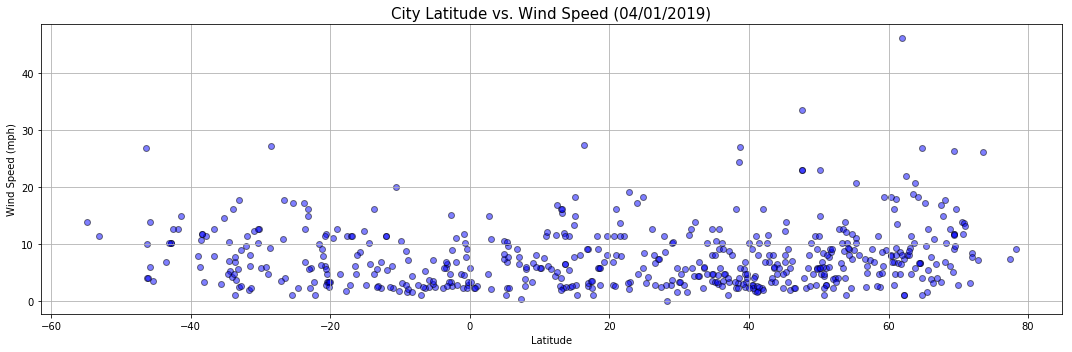

In [141]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(x=df_weather['Lat'], y=df_weather['Wind Speed'], alpha=0.5, c='blue', linewidth=1, edgecolors='black')
ax.set_title(f'City Latitude vs. Wind Speed ({datetime.date.today().strftime("%m/%d/%Y")})',{'fontsize' : 15})
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed (mph)')

ax.set_xlim(auto=True)
ax.set_ylim(auto=True)

ax.grid(True)

fig.tight_layout()
fig.savefig('output/latitude_wind_speed.png')